# Quadrature

In [1]:
%matplotlib inline

import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook', font_scale=1.5)

## Numerical integration (Quadrature)

You may recall from Calculus that integrals can be numerically evaluated using quadrature methods such as Trapezoid and Simpson's's rules. This is easy to do in Python, but has the drawback of the complexity growing as $O(n^d)$ where $d$ is the dimensionality of the data, and hence infeasible once $d$ grows beyond a modest number.

### Integrating functions

In [2]:
from scipy.integrate import quad

In [3]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

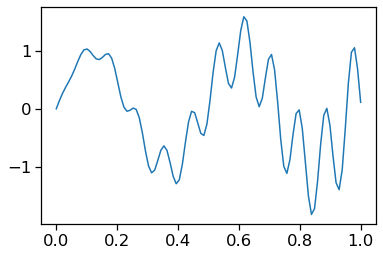

In [4]:
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
pass

#### Exact solution

In [5]:
from sympy import sin, cos, symbols, integrate

x = symbols('x')
integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(6)

0.0202549

#### Using quadrature

In [6]:
y, err = quad(f, 0, 1.0)
y

0.02025493910239419

#### Multiple integration

Following the `scipy.integrate` [documentation](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html), we integrate

$$
I=\int_{y=0}^{1/2}\int_{x=0}^{1-2y} x y \, dx\, dy
$$

In [7]:
x, y = symbols('x y')
integrate(x*y, (x, 0, 1-2*y), (y, 0, 0.5))

0.0104166666666667

In [8]:
from scipy.integrate import nquad

def f(x, y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]

y, err = nquad(f, [bounds_x, bounds_y])
y

0.010416666666666668